In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [23]:
# Load the dataset
# train dataset
data=pd.read_csv('/content/drive/MyDrive/Google collab/train.csv')

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Check for missing values
missing_data=data.isnull().sum()

In [26]:
missing_data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
# Handle missing values
# Handle age values.
data['Age'].fillna(data['Age'].mean(), inplace=True)
# Handle Embarked values.
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
# Handle Cabin values.
data['Cabin'].fillna('Unknown',inplace=True)
print("Missing values handled")

Missing values handled


In [28]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

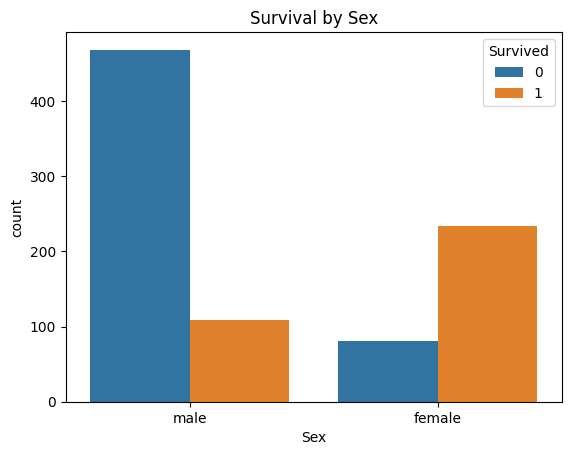

In [30]:
sns.countplot(x='Sex',hue='Survived',data=data)
plt.title('Survival by Sex')
plt.show()

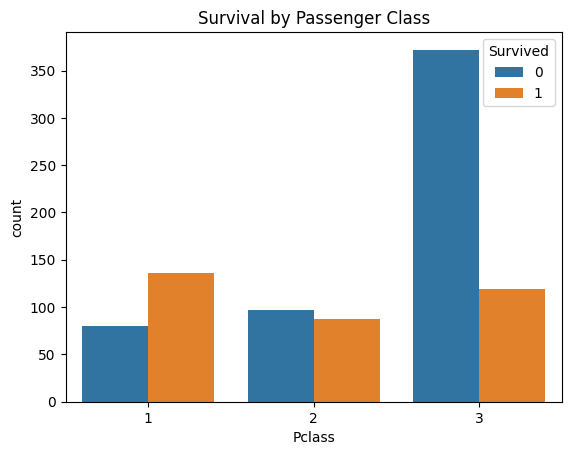

In [31]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Passenger Class')
plt.show()

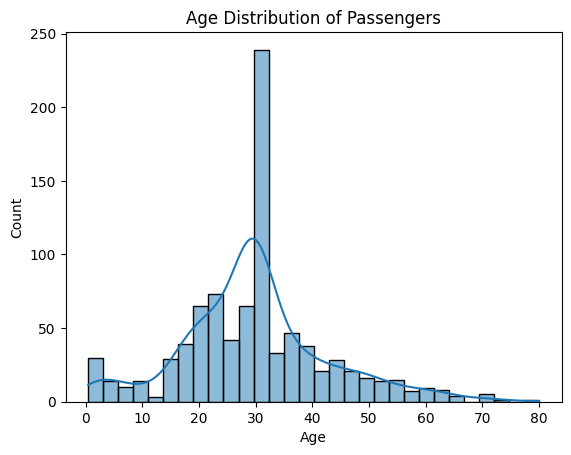

In [32]:
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution of Passengers')
plt.show()

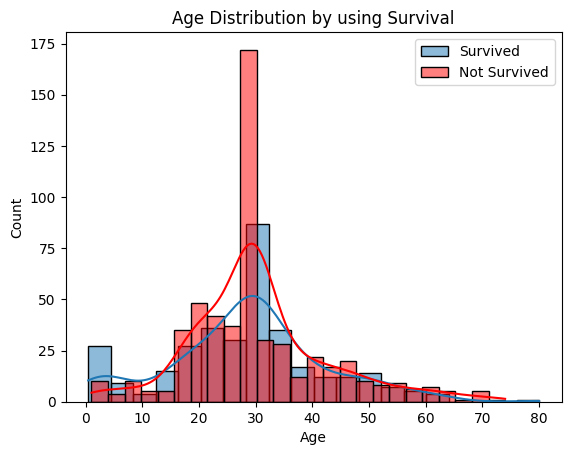

In [33]:
sns.histplot(data[data['Survived'] == 1]['Age'], kde=True, label='Survived')
sns.histplot(data[data['Survived'] == 0]['Age'], kde=True, label='Not Survived', color='red')
plt.title('Age Distribution by using Survival')
plt.legend()
plt.show()

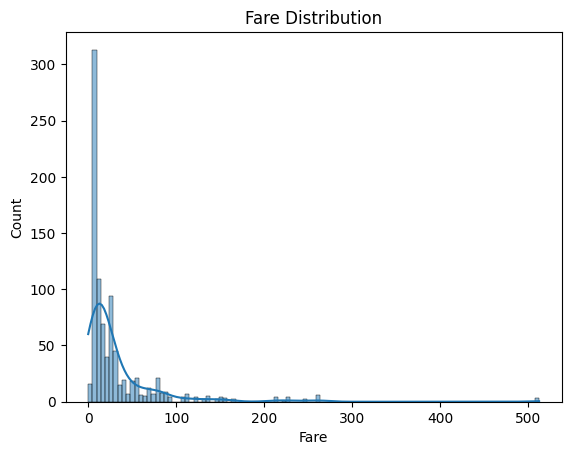

In [34]:
sns.histplot(data['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

<ipython-input-35-ec0bd9cbba4e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


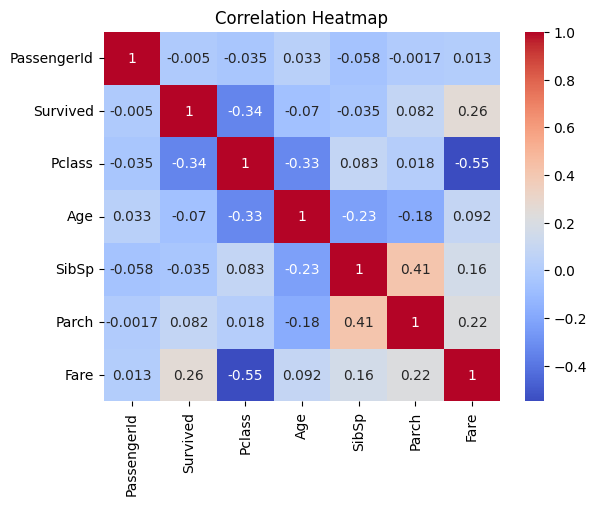

In [35]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

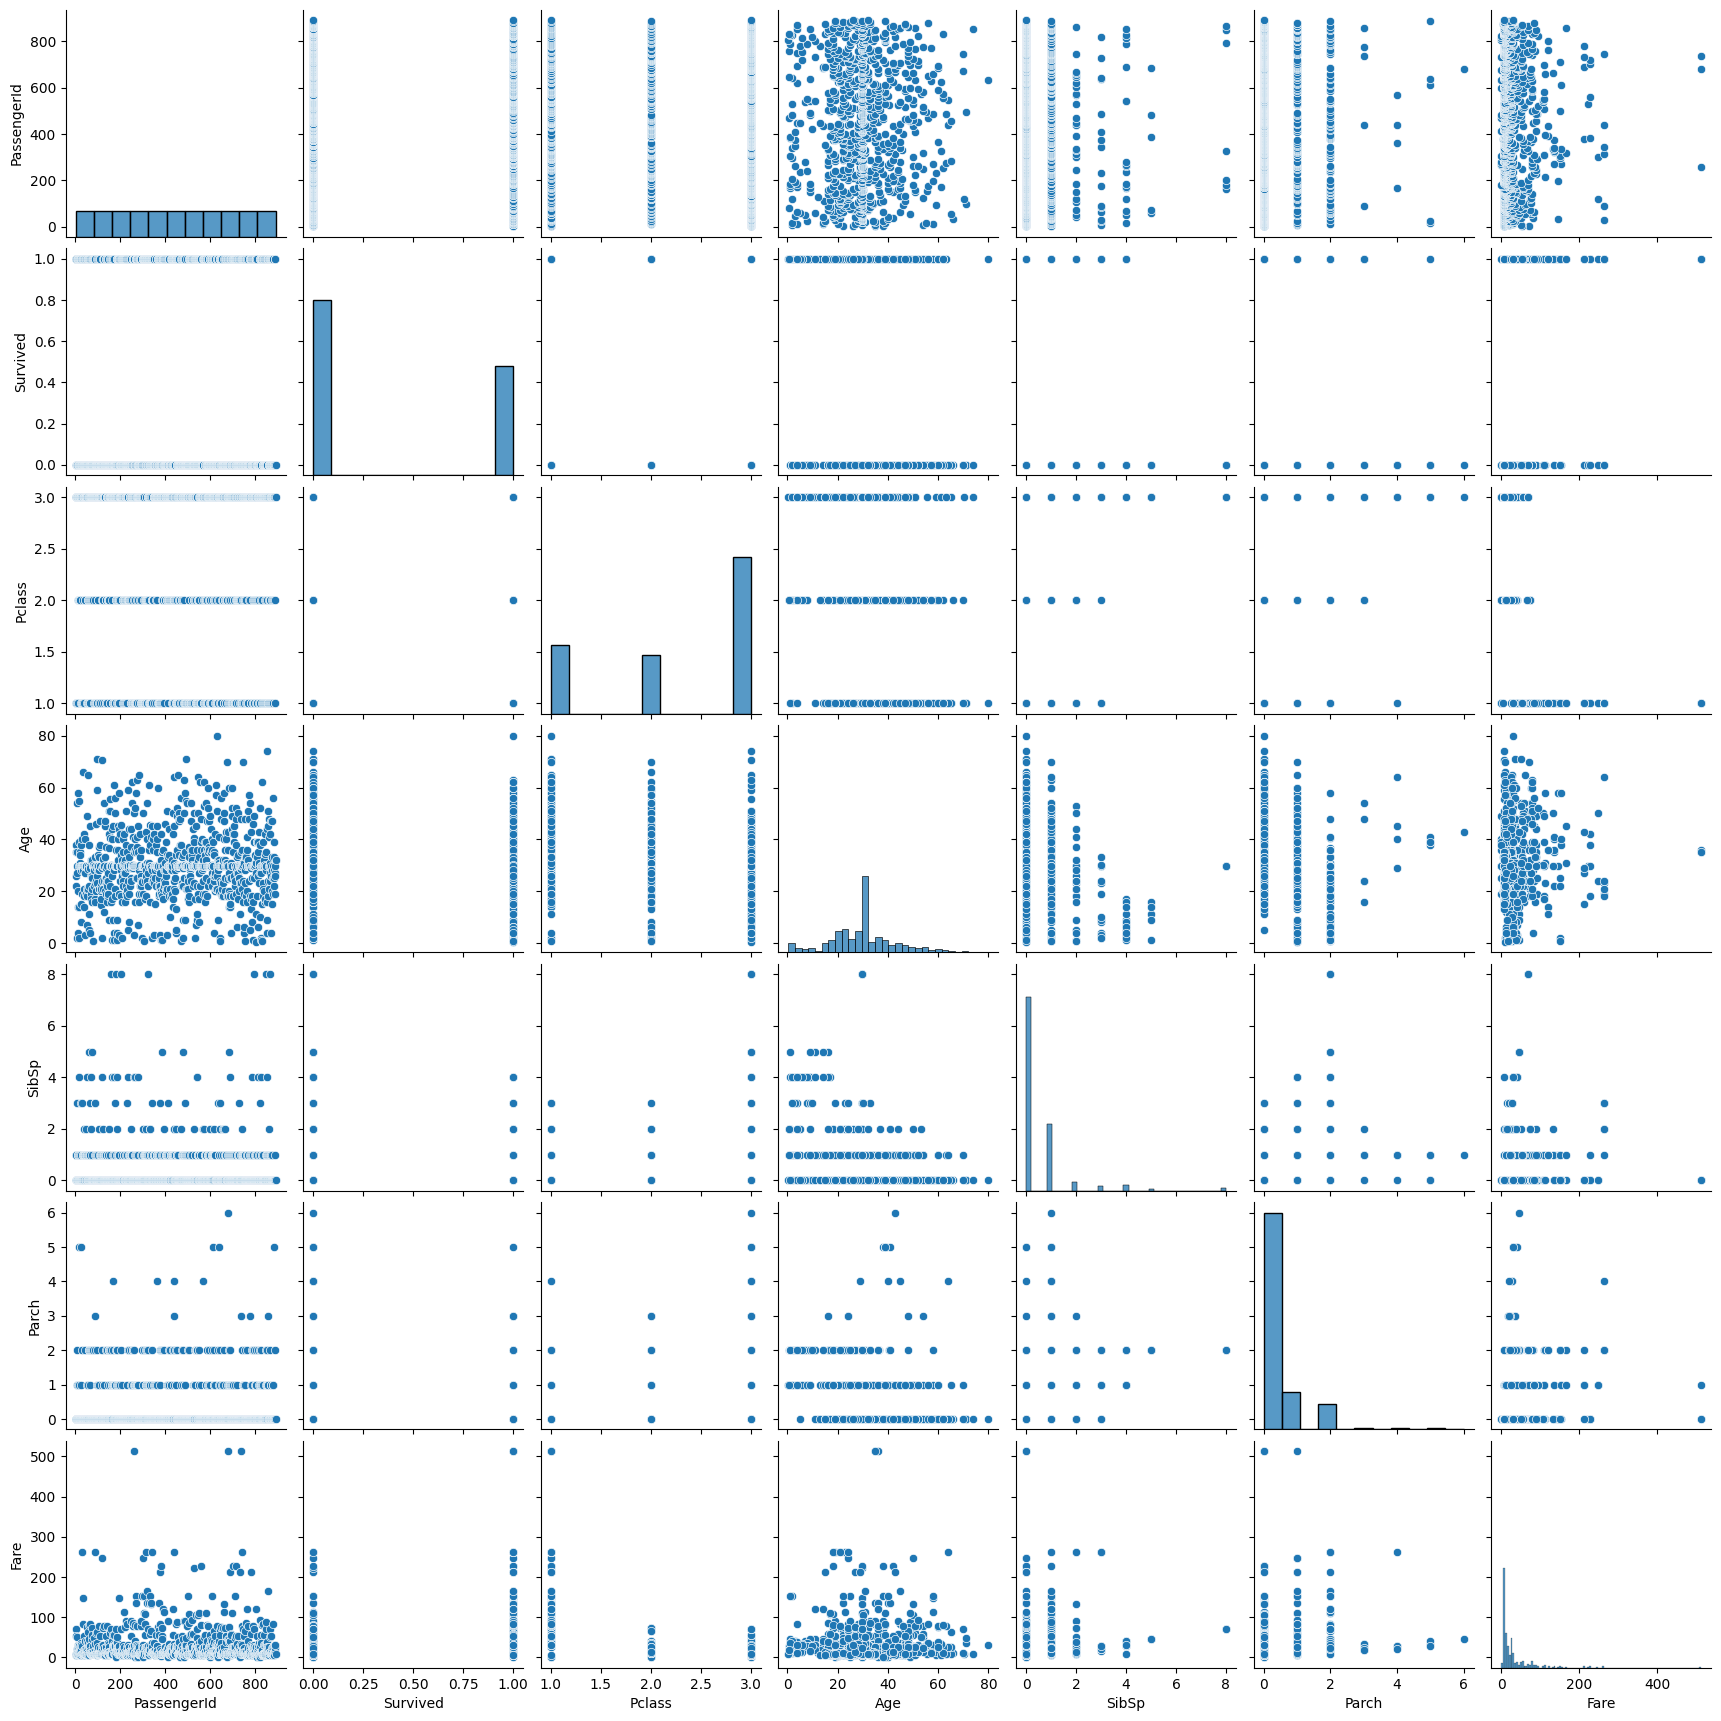

In [36]:
sns.pairplot(data)